## Netflix Data EDA

#### This project analyzes Netflix data to explore trends in movies released during the 1990s and answer key questions. 
#### The analysis uses the netflix_data.csv dataset, which contains information about shows and movies available on Netflix.
#### This is the Schema of the dataset


| Column        | Description                             |
|---------------|-----------------------------------------|
| show_id      | The ID of the show                           |
| type         | Type of show                                 |
| title        | Title of the show                            |
| director     | Director of the show                         |
| cast         | Cast of the show                             |
| country      | Country of origin                            |
| date_added   | Date added to Netflix                        |
| release_year | Year of Netflix release                      |
| duration     | Duration of the show in minutes             |
| description  | Description of the show                      |
| genre        | Show genre                                   |


In [264]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [265]:
# Load the data
df = pd.read_csv('/Users/vaishnavipullakhandam/Desktop/Data_Analysis/Python/Investigating Netflix Movies/Netflix_Data.csv')

In [266]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"""Demián Bichir, Héctor Bonilla, Oscar Serrano,...",Mexico,"""December 23, 2016""",2016,93,"""After a devastating earthquake hits Mexico Ci...",Dramas
1,s3,Movie,23:59,Gilbert Chan,"""Tedd Chan, Stella Chung, Henley Hii, Lawrence...",Singapore,"""December 20, 2018""",2011,78,"""When an army recruit is found dead, his fello...",Horror Movies
2,s4,Movie,9,Shane Acker,"""Elijah Wood, John C. Reilly, Jennifer Connell...",United States,"""November 16, 2017""",2009,80,"""In a postapocalyptic world, rag-doll robots h...",Action
3,s5,Movie,21,Robert Luketic,"""Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",United States,"""January 1, 2020""",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"""Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",Turkey,"""July 1, 2017""",2016,1,"""A genetics professor experiments with a treat...",International TV


In [267]:
# Filter the data based on type movie

movies=df[df['type']=="Movie"]

#print(movies)

In [268]:
# Filtering based on release year between 1990 and 2000

movies_90s=movies[(movies['release_year']>=1990) & (movies['release_year']<2000)]

#print(movies_90s)

In [269]:
print("Total number of 1990s movies:", len(movies_90s))

Total number of 1990s movies: 183


### EDA on Key Questions


##### 1. What was the most frequent movie duration in the 1990s?

In [270]:
freq_duration=movies_90s['duration'].mode()[0]
freq_duration


94

##### 2. How many short action movies were released in the 1990s?

In [271]:
action = movies_90s[movies_90s['genre']=='Action']

# We filter for movies shorter than 90 minutes and containing 'Action' in the genre

short_action = action[action['duration']<90]
len(short_action)

7

##### 3. What are the top 5 genres for movies released in the 1990s?

In [272]:
genre = movies_90s['genre']
top_genres = genre.value_counts().head()
top_genres

Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Name: genre, dtype: int64

##### 4. Who are the directors with the most movies from the 1990s on Netflix?

In [273]:
directors = movies_90s['director']
top_directors=directors.value_counts().head()
top_directors

Johnnie To         4
Youssef Chahine    3
Umesh Mehra        3
Gregory Hoblit     3
Subhash Ghai       3
Name: director, dtype: int64

##### 5. How many movies from the 1990s were added to Netflix each year?

In [274]:
years = movies_90s['release_year']
movie_count=years.value_counts().sort_index()
movie_count

1990    14
1991    14
1992    16
1993    16
1994    14
1995    16
1996    15
1997    26
1998    26
1999    26
Name: release_year, dtype: int64

##### 6. What is the distribution of movie durations for 1990s films?

      release_year  duration
6             1997       119
118           1993       101
145           1998        82
167           1996       108
194           1993       154
...            ...       ...
4672          1999       106
4689          1993       118
4718          1999       106
4746          1994       191
4756          1994       148

[183 rows x 2 columns]


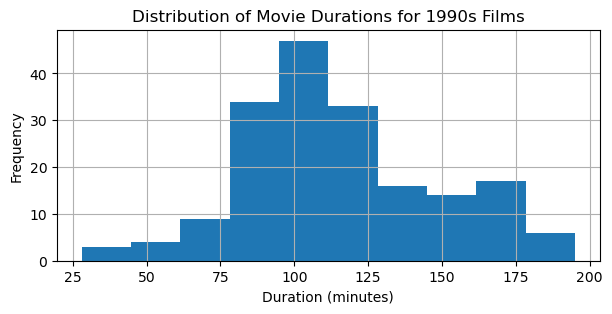

In [275]:
duration_table = movies_90s[['release_year', 'duration']]
print(duration_table)

# Plot the distribution of movie durations for 1990s films
plt.figure(figsize=(7, 3))
plt.hist(movies_90s['duration'])
plt.title('Distribution of Movie Durations for 1990s Films')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



##### 7. Which countries produced the most 1990s movies available on Netflix?

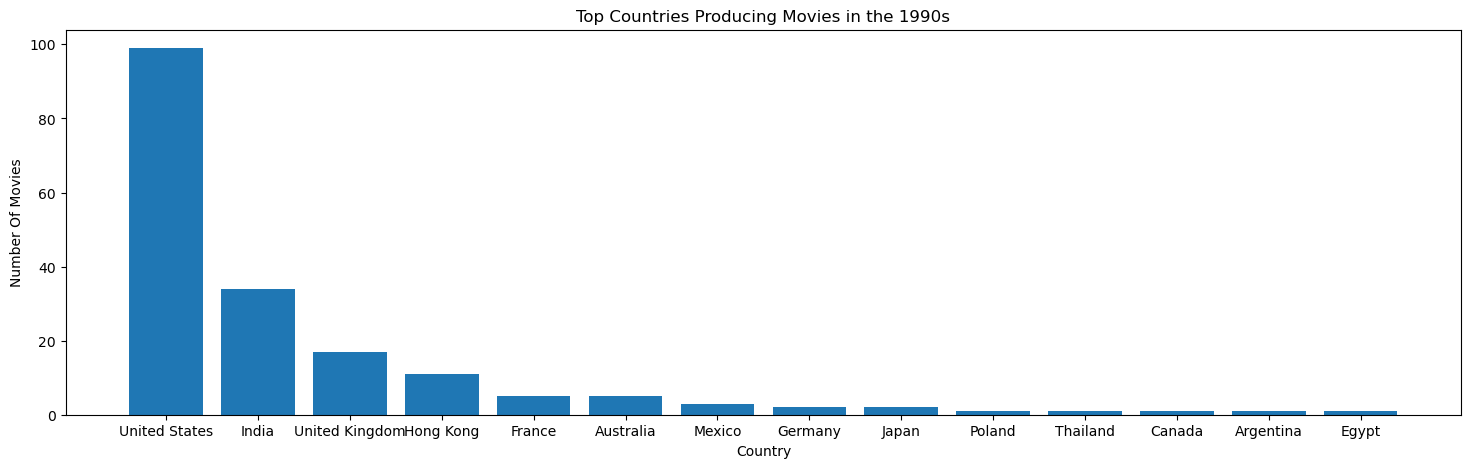

In [276]:
countries=movies_90s['country']
movie_country=countries.value_counts()
movie_country.head()


plt.figure(figsize=(18, 5))
plt.bar(movie_country.index,movie_country.values)
plt.title("Top Countries Producing Movies in the 1990s")
plt.xlabel('Country')
plt.ylabel('Number Of Movies')
plt.show()


##### 8. What is the average cast size for 1990s movies on the platform?

In [277]:
cast_size=movies_90s['cast'].str.split(',').str.len()
cast_size

avg_cast_size = cast_size.mean()
print(f"Average cast size for 1990s movies on Netflix: {avg_cast_size:.2f}")

    

Average cast size for 1990s movies on Netflix: 9.21


##### 9. Are there any correlations between genre and duration for 1990s movies?

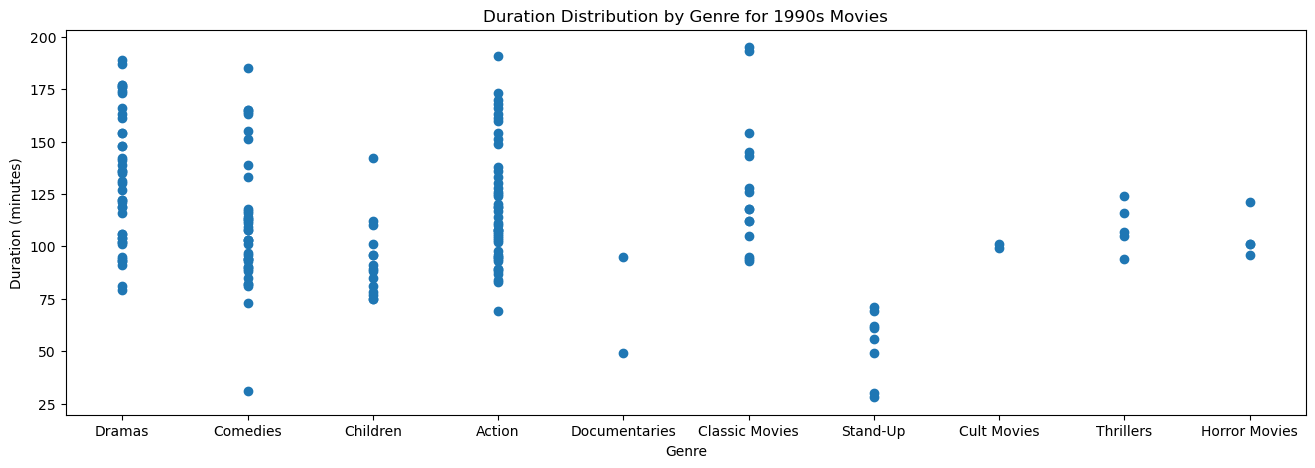

In [278]:
genre=movies_90s['genre']
duration=movies_90s['duration']

plt.figure(figsize=(16, 5))
plt.scatter(genre,duration)
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.title('Duration Distribution by Genre for 1990s Movies')
plt.show()

##### 10. What are the most common words in the descriptions of 1990s movies?

In [279]:
pip install wordcloud matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


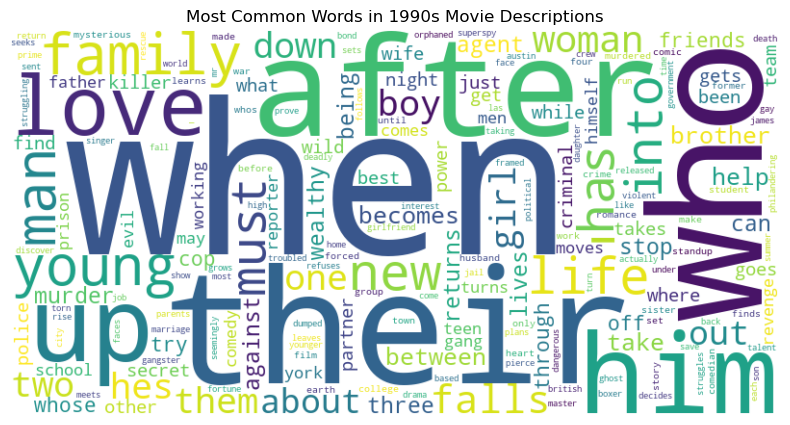

In [280]:

desc = movies_90s['description']

# Combine all descriptions into a single string, ignoring NaN values
all_desc = ' '.join(desc.dropna())

# Preprocess the text
# Convert to lowercase
all_desc = all_desc.lower()

# Remove punctuation
all_desc = all_desc.translate(str.maketrans('', '', string.punctuation))

# Split the string into words
words = all_desc.split()

# Define stop words
stop_words = set(['the', 'is', 'and', 'to', 'a', 'in', 'of', 'that', 'it', 'on', 
                   'for', 'this', 'with', 'as', 'but', 'at', 'by', 'from', 'not', 
                   'be', 'are', 'was', 'an', 'or', 'which', 'all', 'there', 'his', 
                   'her', 'she', 'he', 'they', 'if', 'an', 'my', 'you', 'i'])

# Remove stop words from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most Common Words in 1990s Movie Descriptions')
plt.show()
